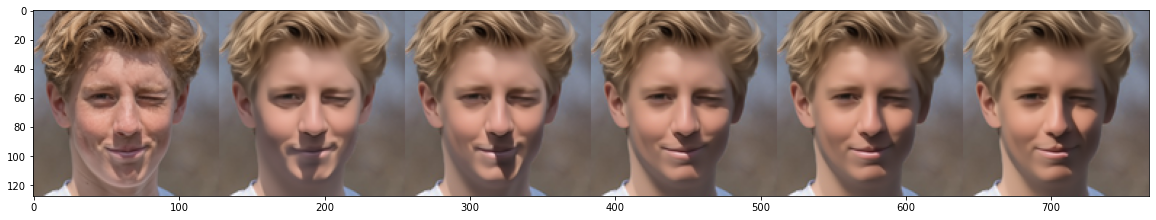

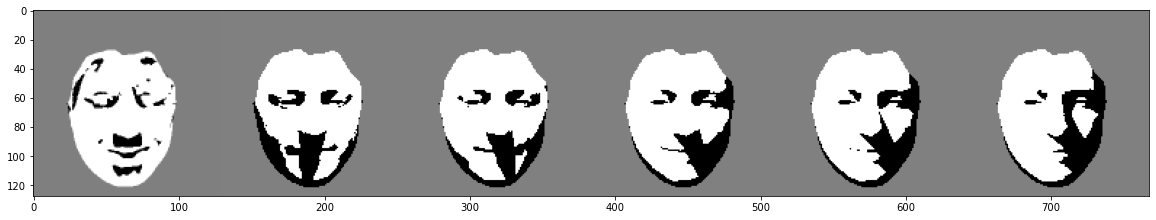

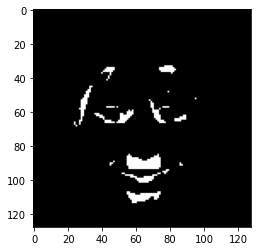

1557 4575
Ratio:  2.9383429672447012
1557 3999
Ratio:  2.5684007707129095
1557 4092
Ratio:  2.628131021194605
1557 4260
Ratio:  2.7360308285163777
1557 4605
Ratio:  2.9576107899807322


In [11]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def create_image_grid(images, n_rows=1):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    # img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)
    return grid_image

path = '/data/mint/sampling/TPAMI/cast_shadows_results/log=DiFaReli_Sdiff_median_128_cfg=DiFaReli_Sdiff_median_128.yaml_inv_with_sd/ema_070000/valid/render_face/reverse_sampling/src=62514.jpg/dst=65112.jpg/Lerp_1000/n_frames=60/'
out = ['res_frame0.png', 'res_frame1.png', 'res_frame13.png', 'res_frame25.png', 'res_frame37.png', 'res_frame49.png']

fig = plt.figure(figsize=(20, 20))
imgs = [np.array(Image.open(path + f)) for f in out]
plt.imshow(create_image_grid(imgs, n_rows=1))
plt.show()

fig = plt.figure(figsize=(20, 20))
imgs = [np.array(Image.open(path + f.replace('res', 'shadm'))) for f in out]
plt.imshow(create_image_grid(imgs, n_rows=1))
plt.show()

n_sd = np.isclose(imgs[0], 0)
plt.imshow(n_sd*1.0)
plt.show()
for img in imgs[1:]:
    n_sdi = np.isclose(img, 0)
    print(np.sum(n_sd), np.sum(n_sdi))
    print("Ratio: ", np.sum(n_sdi)/np.sum(n_sd))


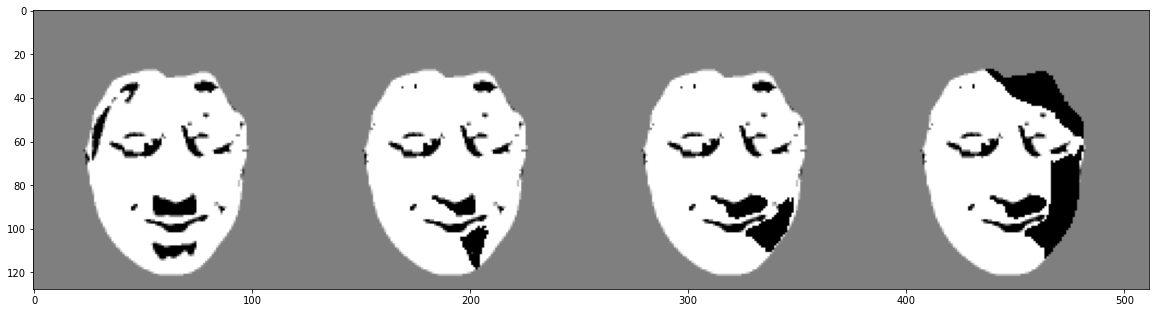

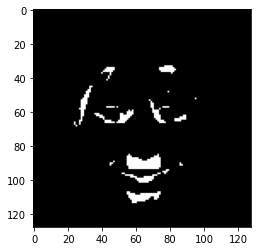

1557 1356
Ratio:  0.8709055876685935
1557 1845
Ratio:  1.1849710982658959
1557 4221
Ratio:  2.7109826589595376


In [15]:
path = '/home/mint/Dev/DiFaReli/difareli-faster/experiment_scripts/TPAMI/cast_shadows/gimp_set/'
out = ['62514_frame0.png', '62514_frame1.png', '62514_frame2.png', '62514_frame4.png']

fig = plt.figure(figsize=(20, 20))
imgs = [np.array(Image.open(path + f)) for f in out]
plt.imshow(create_image_grid(imgs, n_rows=1))
plt.show()

n_sd = np.isclose(imgs[0], 0)
plt.imshow(n_sd*1.0)
plt.show()
for img in imgs[1:]:
    n_sdi = np.isclose(img, 0)
    print(np.sum(n_sd), np.sum(n_sdi))
    print("Ratio: ", np.sum(n_sdi)/np.sum(n_sd))
